### Import necessary libraries 

In [1]:
import numpy                    as np
import pandas                   as pd
import seaborn                  as sns
import timeit


from   sklearn.datasets         import load_boston

from   sklearn.cross_validation import ShuffleSplit
from   sklearn.cross_validation import train_test_split
from   sklearn.metrics          import make_scorer
from   sklearn.tree             import DecisionTreeRegressor

from   sklearn.model_selection  import ParameterGrid, cross_val_score
from   sklearn.grid_search      import GridSearchCV, RandomizedSearchCV
from   scipy.stats              import randint, uniform


from   sklearn.metrics          import r2_score, mean_squared_error

import matplotlib.pyplot        as plt

# Pretty display for notebooks
%matplotlib inline

D:\Python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Python\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
'''
    Calculates and returns the performance score between 
    true and predicted values based on the metric chosen. 
'''
def performance_metric(y_true, y_predict):


    score = r2_score(y_true, y_predict)

    return score

In [4]:
# Load the pre-loaded Boston housing dataset

boston              =  load_boston()
boston_df           =  pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['MEDV']   =  boston.target

In [5]:
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
boston_df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
#The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
usecols             =  ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
data1               =  boston_df.copy()
data                =  data1[usecols]     

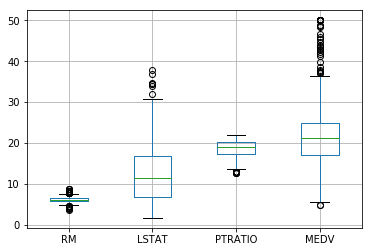

In [8]:
data.boxplot()

In [9]:
prices              = data['MEDV']
features            = data.drop('MEDV', axis = 1)

In [10]:
print('Boston housing dataset has {0} data points with {1} variables each'.\
      format(data.shape[0],data.shape[1]))

Boston housing dataset has 506 data points with 4 variables each


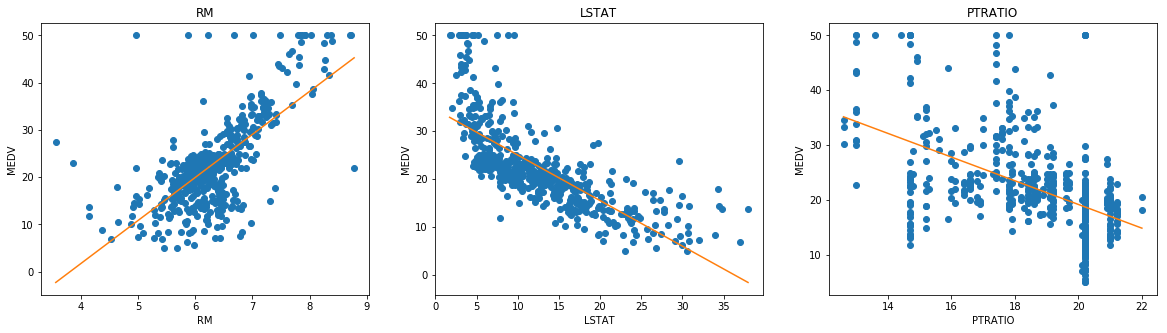

In [11]:
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

print("Training and testing split was successful.")

Training and testing split was successful.


In [13]:
'''
This function performs grid search over the 'max_depth' parameter for a 
decision tree regressor trained on the input data [X, y]

Step 1: Create cross-validation sets from the training data using ShuffleSplit
        to save time instead of KFold

Step 2: Instantiate the regressor object

Step 3: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10 and
        'min_sample_split' from 2 to 5
        
Step 4: Transform 'performance_metric' into a scoring function using 'make_scorer' 
        We have created performance_metric using R2_score
        
Step 5: Create the grid search object 

Step 6: Fit the grid search object to the data to compute the optimal model

'''
def fit_model(X, y):

    cv_sets             =  ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    # n_iter is the number of re-shuffling & splitting iterations.

    regressor           =   DecisionTreeRegressor(random_state = 0)

    dt_range            =   list(range(1,11))
    min_sample_split_S  =   list(range(2, 6))
    params      =   dict(max_depth = dt_range, min_samples_split = min_sample_split_S)
    print('\n>> Parameter space << \n')
    print(list(ParameterGrid(params)))
    print('\n')
    
    scoring_fn  =   make_scorer(performance_metric)

    grid        =   GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fn)
    
    grid        =   grid.fit(X, y)

    return grid.best_estimator_  

In [14]:
# Fit the training data to the model using grid search
reg                       =    %time fit_model(X_train, y_train)

print(reg)
# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(reg.get_params()['min_samples_split']))



>> Parameter space << 

[{'max_depth': 1, 'min_samples_split': 2}, {'max_depth': 1, 'min_samples_split': 3}, {'max_depth': 1, 'min_samples_split': 4}, {'max_depth': 1, 'min_samples_split': 5}, {'max_depth': 2, 'min_samples_split': 2}, {'max_depth': 2, 'min_samples_split': 3}, {'max_depth': 2, 'min_samples_split': 4}, {'max_depth': 2, 'min_samples_split': 5}, {'max_depth': 3, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 3}, {'max_depth': 3, 'min_samples_split': 4}, {'max_depth': 3, 'min_samples_split': 5}, {'max_depth': 4, 'min_samples_split': 2}, {'max_depth': 4, 'min_samples_split': 3}, {'max_depth': 4, 'min_samples_split': 4}, {'max_depth': 4, 'min_samples_split': 5}, {'max_depth': 5, 'min_samples_split': 2}, {'max_depth': 5, 'min_samples_split': 3}, {'max_depth': 5, 'min_samples_split': 4}, {'max_depth': 5, 'min_samples_split': 5}, {'max_depth': 6, 'min_samples_split': 2}, {'max_depth': 6, 'min_samples_split': 3}, {'max_depth': 6, 'min_samples_split': 4}, {'max_de

### Evaluate the model performance using the test data

In [15]:
y_pred         =   reg.predict(X_test)

In [16]:
mape          =   mean_absolute_percentage_error(y_test.values.ravel(), y_pred)

rmse          =   np.sqrt(mean_squared_error(y_test.values.ravel(), y_pred))

# Print metrics
print('Mean Absolute Percentage Error:', round(mape, 2))
print('Root Mean Squared Error:', round(rmse, 2))

Mean Absolute Percentage Error: 16.28
Root Mean Squared Error: 5.7


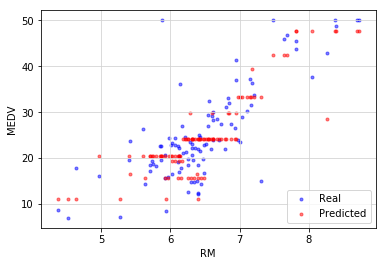

In [17]:
# Define x axis
x_axis = X_test.RM

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

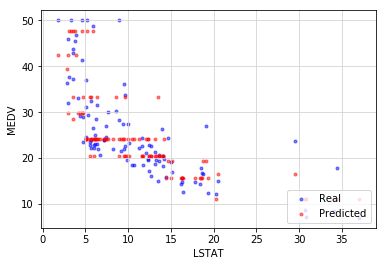

In [18]:
# Define x axis
x_axis = X_test.LSTAT

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

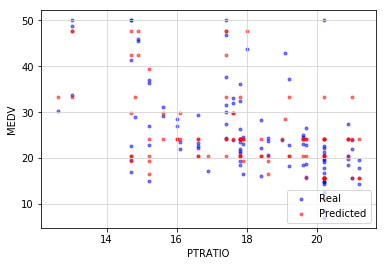

In [19]:
# Define x axis
x_axis = X_test.PTRATIO

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

### Random Grid Search

In [20]:
'''
    Performs grid search over the 'max_depth' parameter for a decision tree regressor 
    trained on the input data [X, y].

Step 1: Create cross-validation sets from the training data using ShuffleSplit
        to save time instead of KFold

Step 2: Instantiate the regressor object

Step 3: Create a dictionary for the parameter 'max_depth' with a range from 1 to 20 and
        'min_sample_split' from 2 to 5 and use randint in scipy.stats module to 
         select a random variate sample for each of these
        
Step 4: Transform 'performance_metric' into a scoring function using 'make_scorer' 
        We have created performance_metric using R2_score
        
Step 5: Create the grid search object 

Step 6: Fit the grid search object to the data to compute the optimal model

'''
def fit_model_random_search(X, y):

    cv_sets     = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    regressor   = DecisionTreeRegressor(random_state = 0)

    params              =   dict(max_depth         = randint(1, 21),\
                                 min_samples_split = randint(2, 6))

    print('\n', params)
    
    scoring_fn  = make_scorer(performance_metric)

    rand_grid   = RandomizedSearchCV(regressor, params, cv = cv_sets, scoring = scoring_fn)

    rand_grid   = rand_grid.fit(X, y)

    return rand_grid.best_estimator_

In [21]:
# Fit the training data to the model using grid search
reg_1                       =    %time fit_model_random_search(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".\
      format(reg_1.get_params()['max_depth']))
print("Parameter 'min_samples_split' is {} for the optimal model.".\
      format(reg_1.get_params()['min_samples_split']))


 {'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CF3AA27630>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CF3AA239B0>}
Wall time: 187 ms
Parameter 'max_depth' is 8 for the optimal model.
Parameter 'min_samples_split' is 4 for the optimal model.


In [22]:
reg_1  

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

### Evaluate the model performance using the test data

In [23]:
y_pred         =   reg_1.predict(X_test)

In [24]:
mape          =   mean_absolute_percentage_error(y_test.values.ravel(), y_pred)

rmse          =   np.sqrt(mean_squared_error(y_test.values.ravel(), y_pred))

# Print metrics
print('Mean Absolute Percentage Error:', round(mape, 2))
print('Root Mean Squared Error:', round(rmse, 2))

Mean Absolute Percentage Error: 13.88
Root Mean Squared Error: 5.34


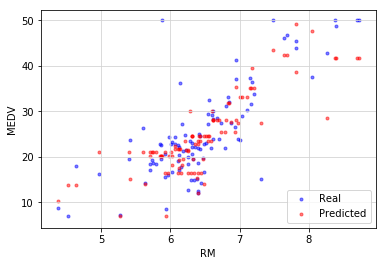

In [25]:
# Define x axis
x_axis = X_test.RM

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

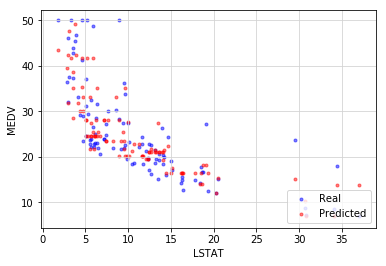

In [26]:
# Define x axis
x_axis = X_test.LSTAT

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

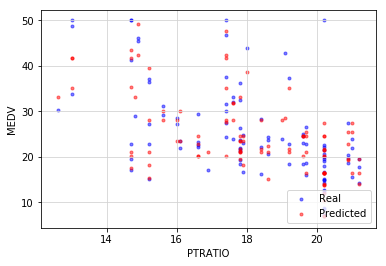

In [27]:
# Define x axis
x_axis = X_test.PTRATIO

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

In [28]:
from hyperopt import hp, tpe, fmin, STATUS_OK, Trials

In [29]:
def objective(params):
    clf         =   DecisionTreeRegressor(**params)
    scoring_fn  =   make_scorer(performance_metric)
    loss        =   1- cross_val_score(clf, X_train, y_train, scoring = scoring_fn).mean()
    return {'loss': loss, 'status': STATUS_OK}

In [30]:
p_space = {
        'max_depth':         hp.choice('max_depth', list(range(1, 21))),
        'min_samples_split': hp.choice('min_samples_split', [2, 3, 4, 5]),
}

In [31]:
tpe_trials = Trials()
best       = %time fmin(objective, p_space, algo = tpe.suggest, max_evals = 10, trials = tpe_trials)

100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 110.48it/s, best loss: 0.32299253626162316]
Wall time: 90.5 ms


In [32]:
# Dataframe of results from optimization
tpe_results = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results], 
                            'iteration': tpe_trials.idxs_vals[0]['max_depth'],
                            'max_depth': tpe_trials.idxs_vals[1]['max_depth'],
                            'min_samples_split': tpe_trials.idxs_vals[1]['min_samples_split']})

tpe_final   = tpe_results.loc[tpe_results['min_samples_split'] > 1 &  (tpe_results['max_depth'] > 0)]
tpe_final   = tpe_final.drop_duplicates(['max_depth','min_samples_split'], keep = 'first')
tpe_final.sort_values(by = 'loss', inplace = True, ascending = True)                          
tpe_final.head()

,loss,iteration,max_depth,min_samples_split
5,0.322993,5,5,2
9,0.343346,9,9,3
1,0.388355,1,1,3
7,0.389129,7,2,3
2,0.392091,2,11,3


In [38]:
reg_2          =   DecisionTreeRegressor(max_depth = 5, min_samples_split = 2, \
                                         random_state = 0).fit(X_train, y_train)
y_pred         =   reg_2.predict(X_test)

In [39]:
mape          =   mean_absolute_percentage_error(y_test.values.ravel(), y_pred)

rmse          =   np.sqrt(mean_squared_error(y_test.values.ravel(), y_pred))

# Print metrics
print('Mean Absolute Percentage Error:', round(mape, 2))
print('Root Mean Squared Error:', round(rmse, 2))

Mean Absolute Percentage Error: 14.53
Root Mean Squared Error: 5.2


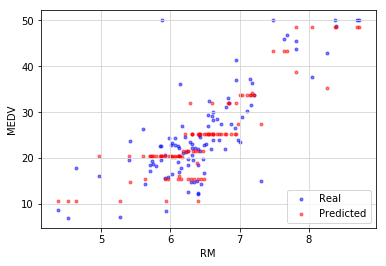

In [40]:
# Define x axis
x_axis = X_test.RM

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

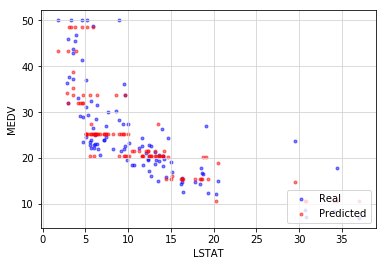

In [41]:
# Define x axis
x_axis = X_test.LSTAT

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

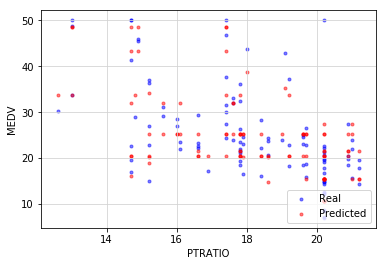

In [42]:
# Define x axis
x_axis = X_test.PTRATIO

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()